In [40]:
import pandas as pd
import numpy as np
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta 
import glob
import os
%matplotlib inline



In [41]:
# Set up input folder
data_folder = '../../data/kangaroopoint'

# Check if folder exists
if os.path.exists(data_folder):
    print(f"Data folder exists: {data_folder}")
else:
    print(f"Warning: Data folder does not exist: {data_folder}")
    
# Get all CSV files in the data folder
csv_files = glob.glob(os.path.join(data_folder, 'SPIT_*.csv'))

# Initialize an empty DataFrame to store all data
all_data = pd.DataFrame()



Data folder exists: ../../data/kangaroopoint


Reading file: ../../data/kangaroopoint/SPIT_2024_08_31_23H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_28_12H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_29_21H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_31_14H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_31_15H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_29_00H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_29_01H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_29_02H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_31_17H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_29_23H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_30_19H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_29_20H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_29_22H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_29_14H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_31_12H.csv
Reading file: ../../data/kangaroopoint/SPIT_2024_08_29_

/tmp/ipykernel_42932/1021554838.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_path, parse_dates=['Time'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))
/tmp/ipykernel_42932/1021554838.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_path, parse_dates=['Time'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))
/tmp/ipykernel_42932/1021554838.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv(file_path, parse_dates=['Tim

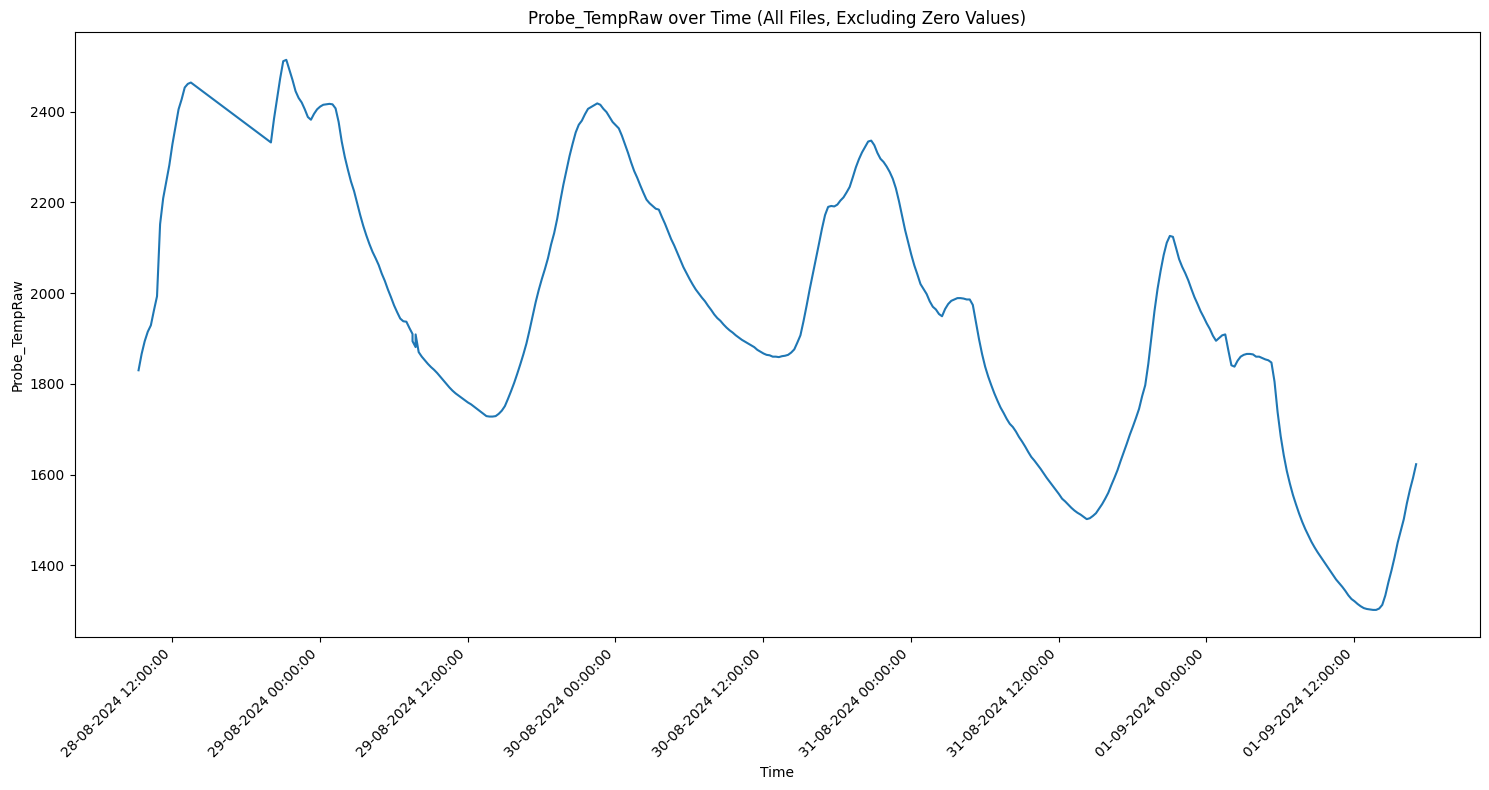

Graph created for Probe_TempRaw


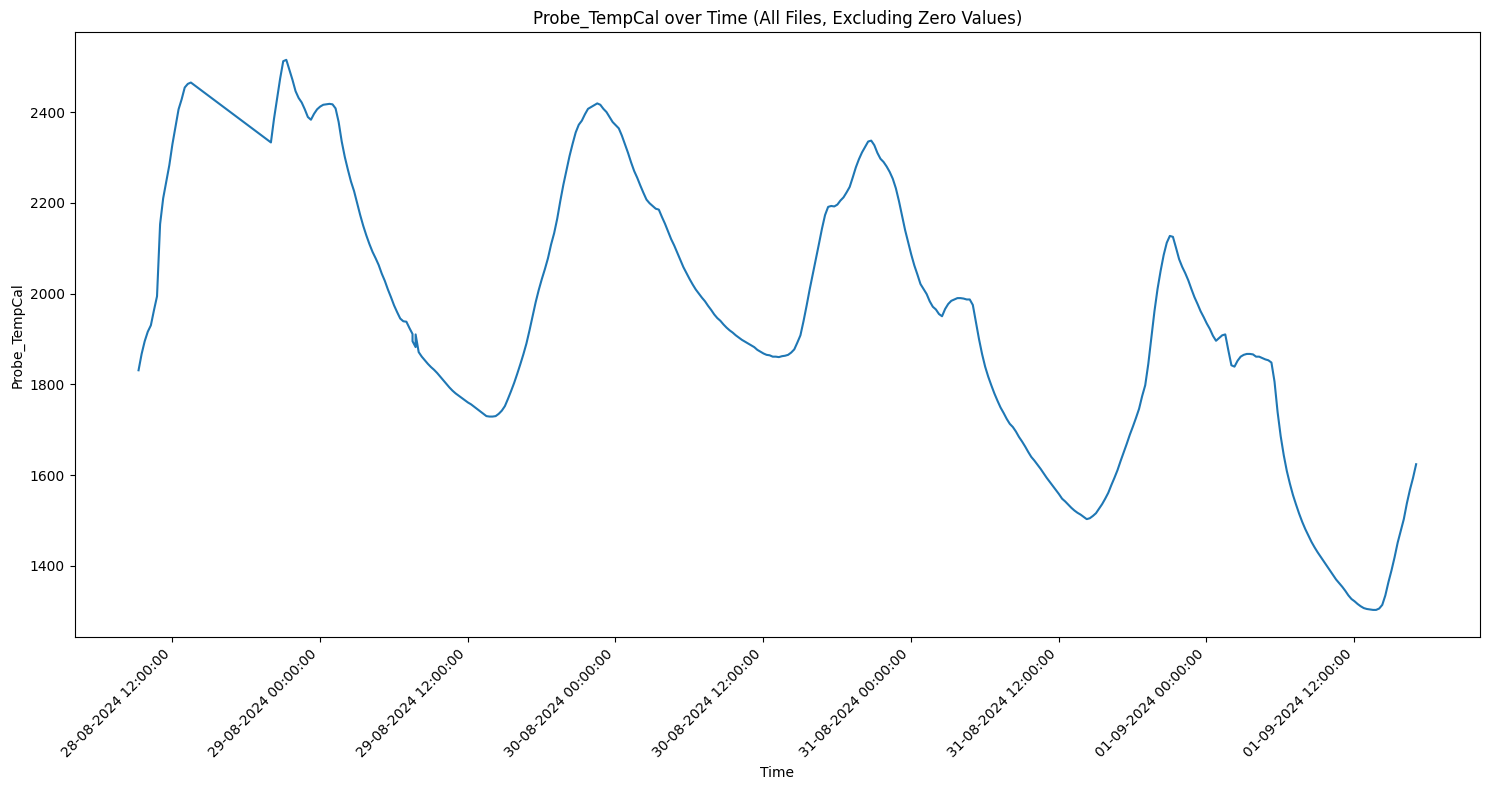

Graph created for Probe_TempCal


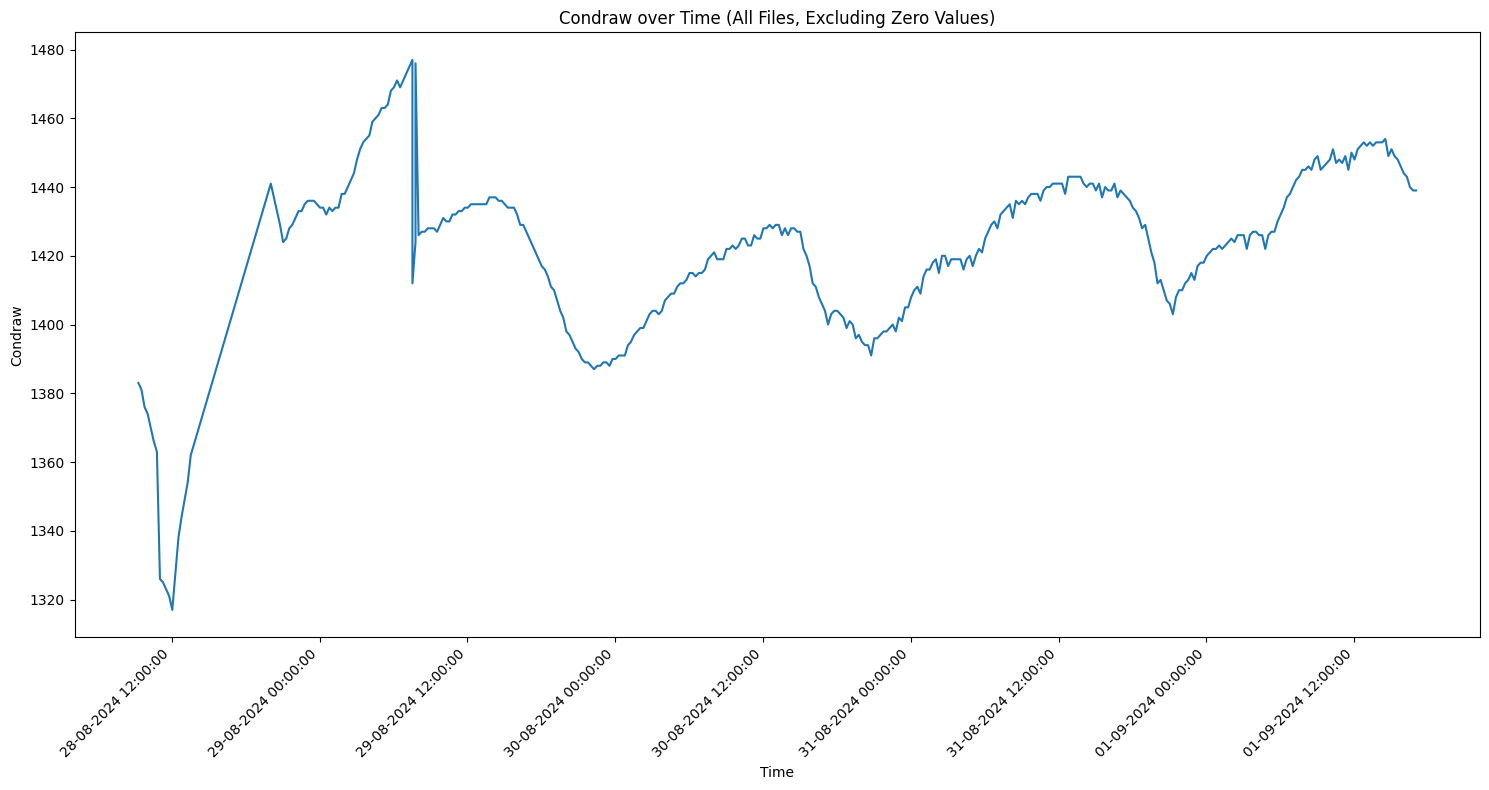

Graph created for Condraw


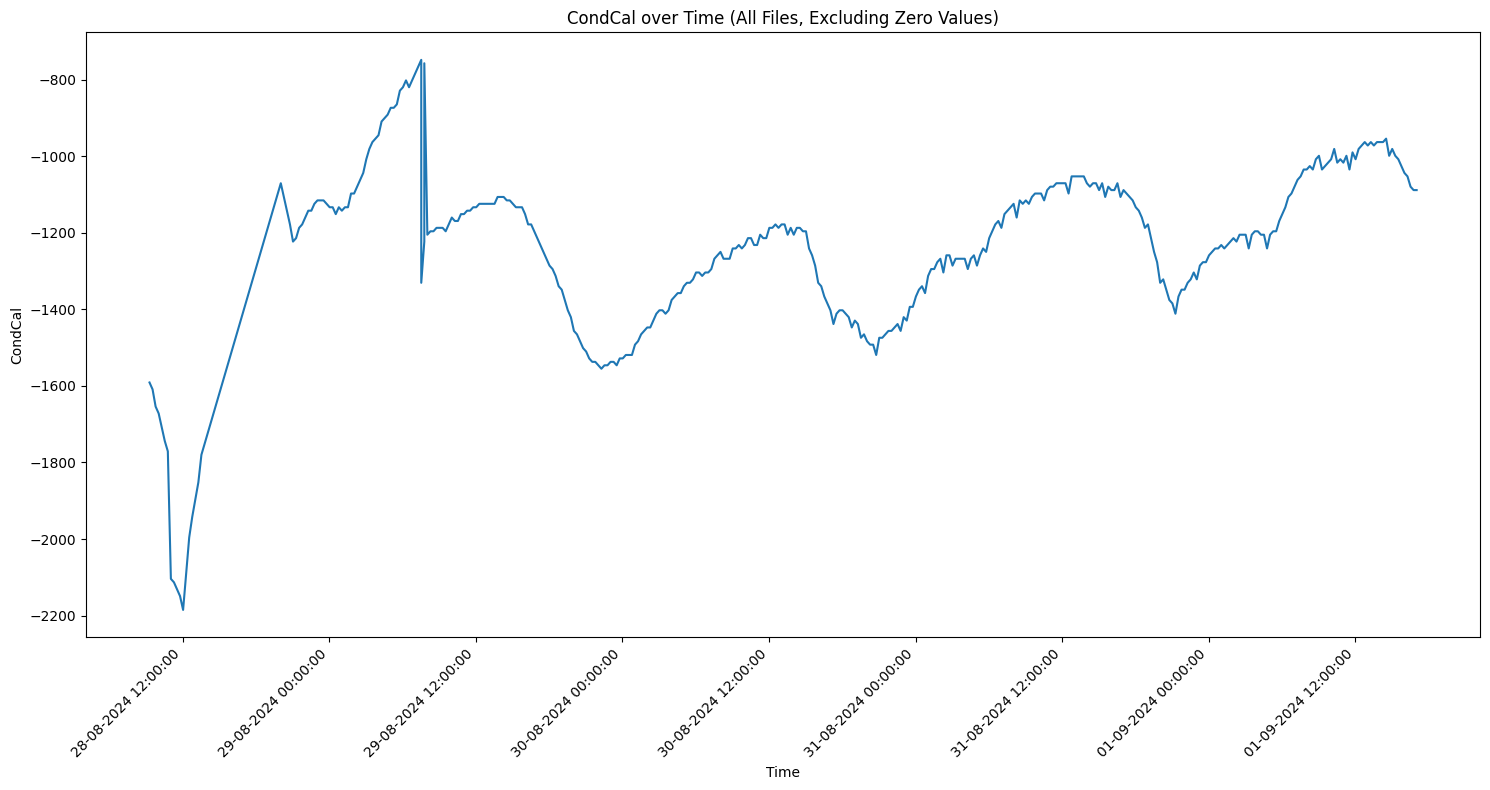

Graph created for CondCal


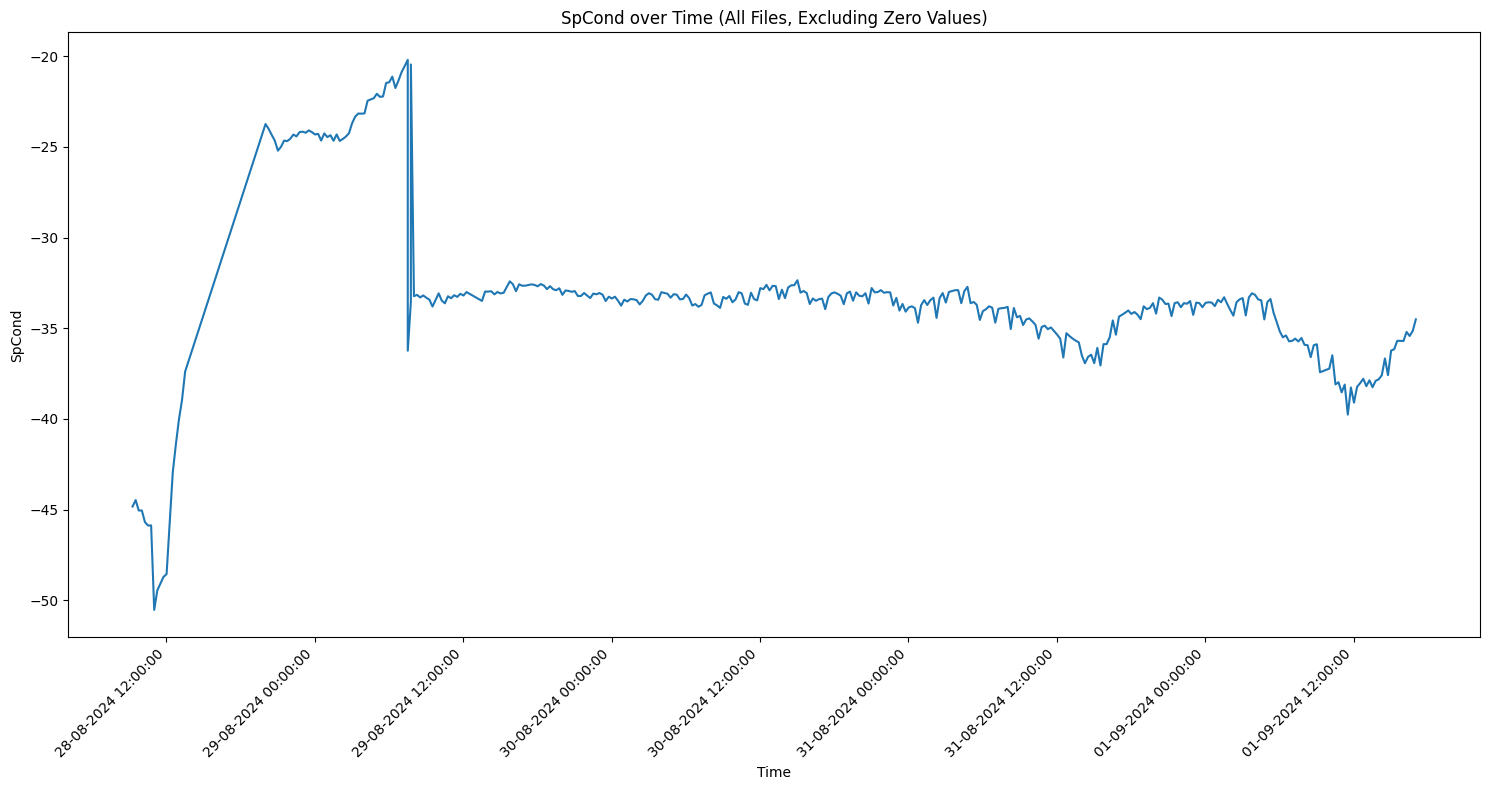

Graph created for SpCond


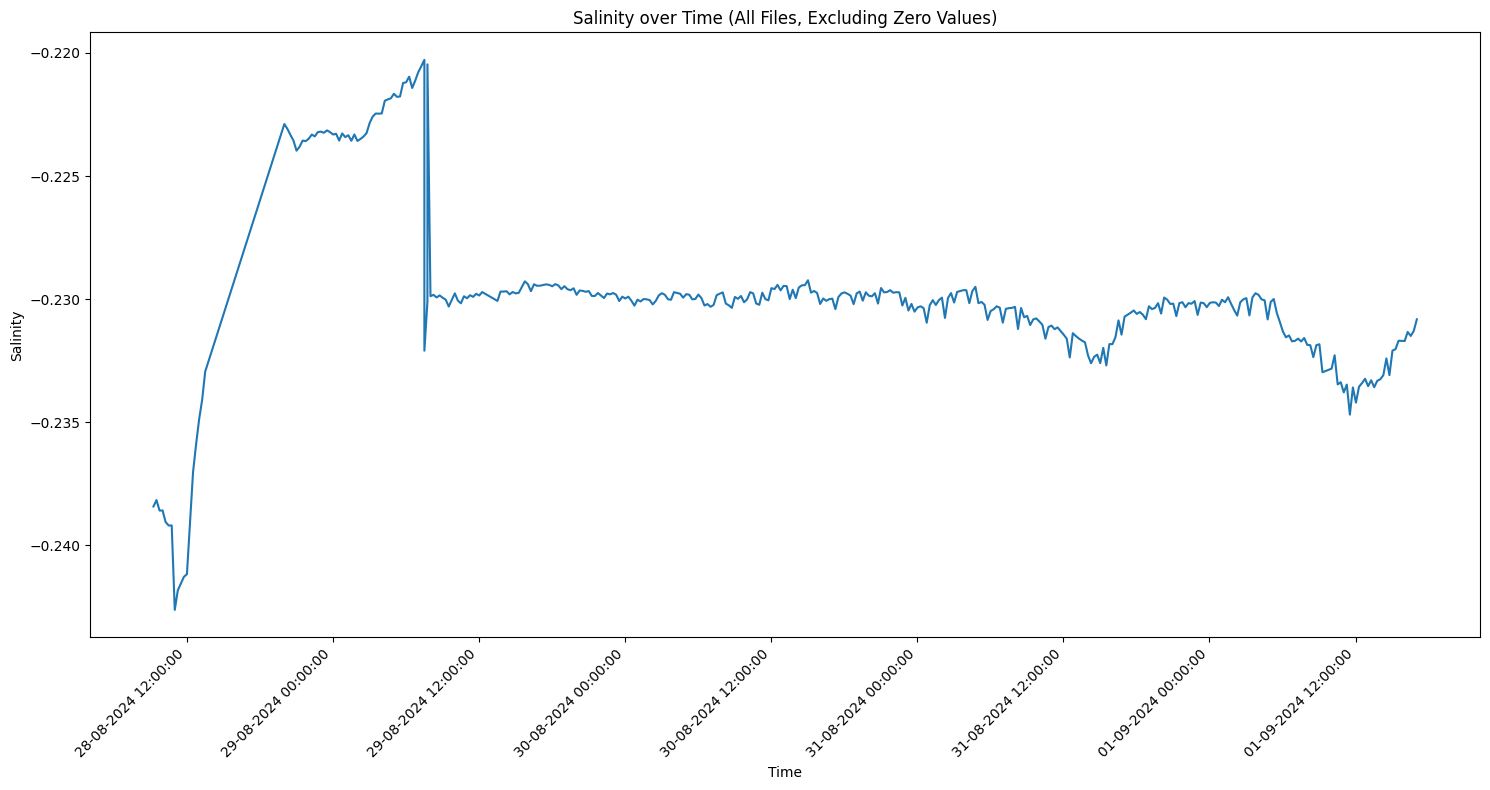

Graph created for Salinity


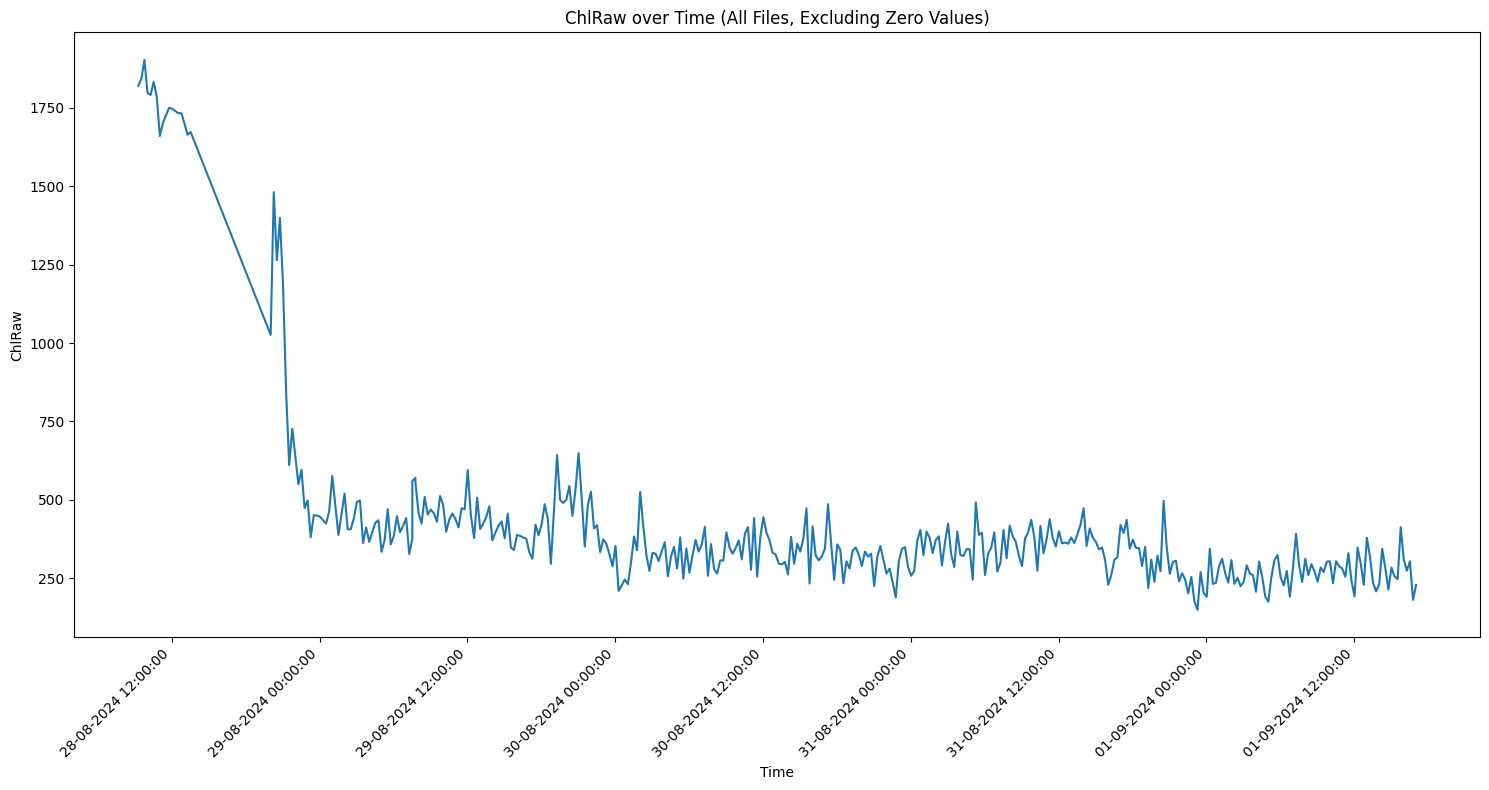

Graph created for ChlRaw


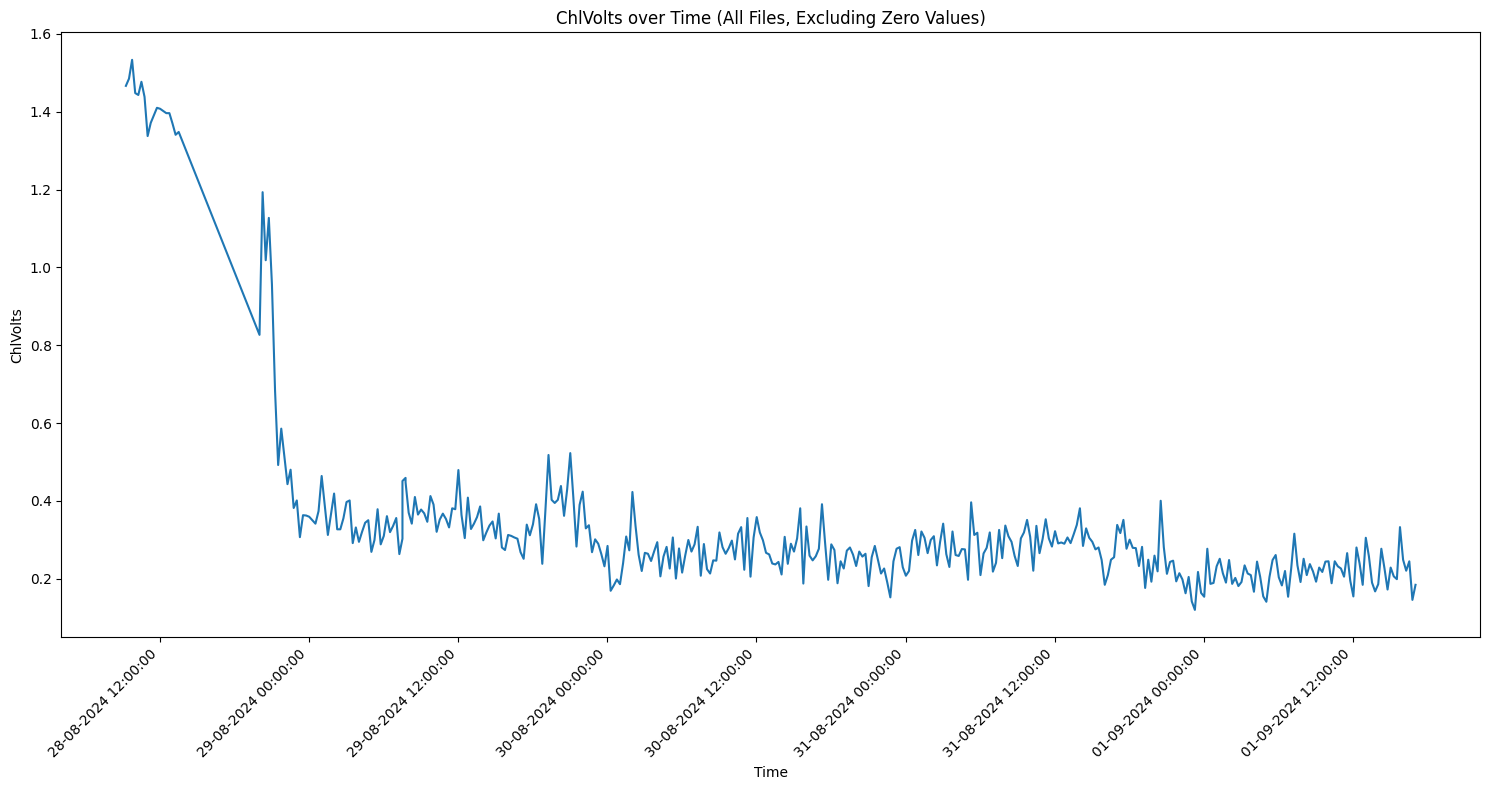

Graph created for ChlVolts


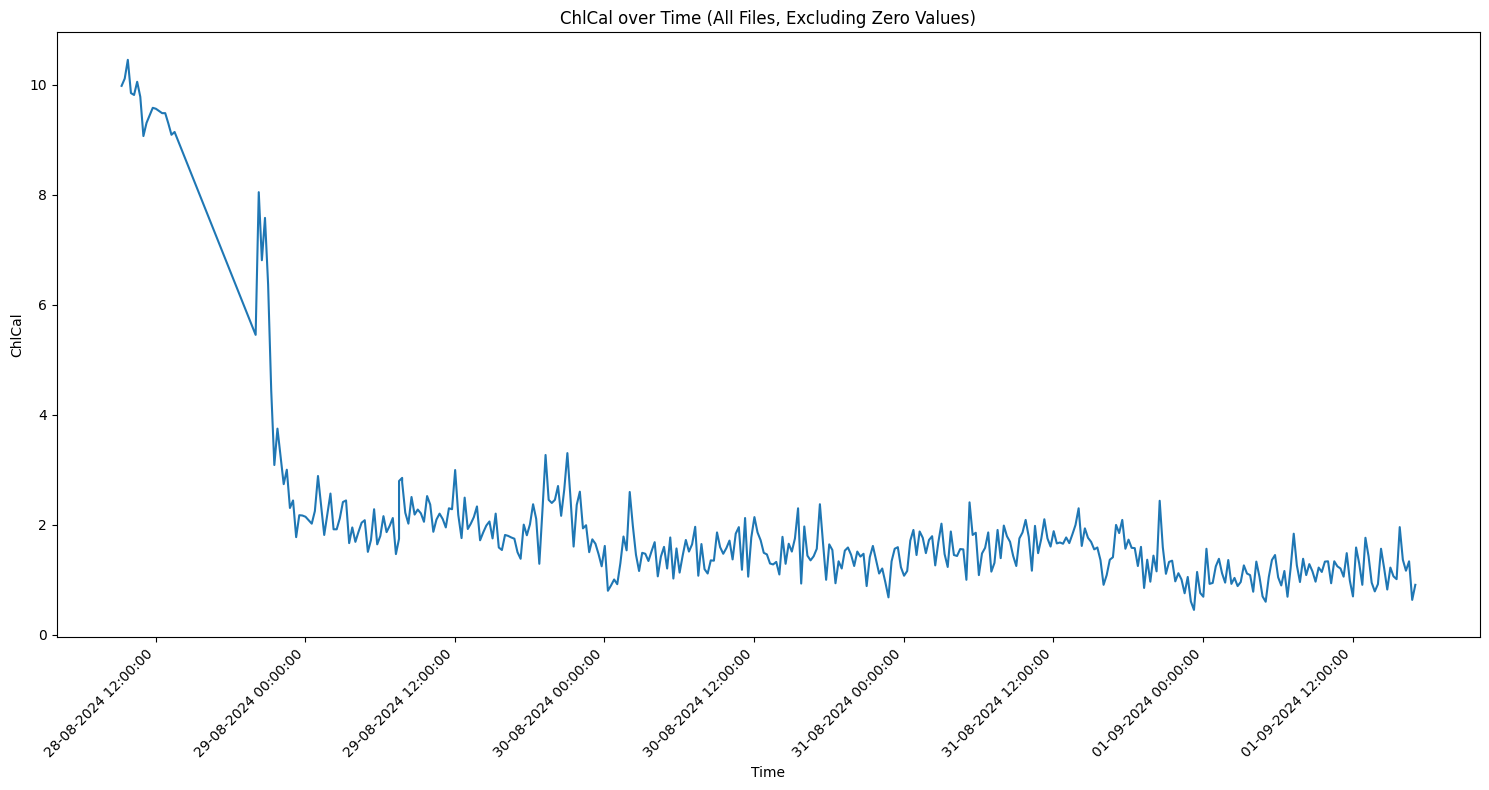

Graph created for ChlCal
No non-zero values to plot for CDOMRaw
No non-zero values to plot for CDOMVolts
No non-zero values to plot for CDOMCal
No non-zero values to plot for CDOMChlEQ


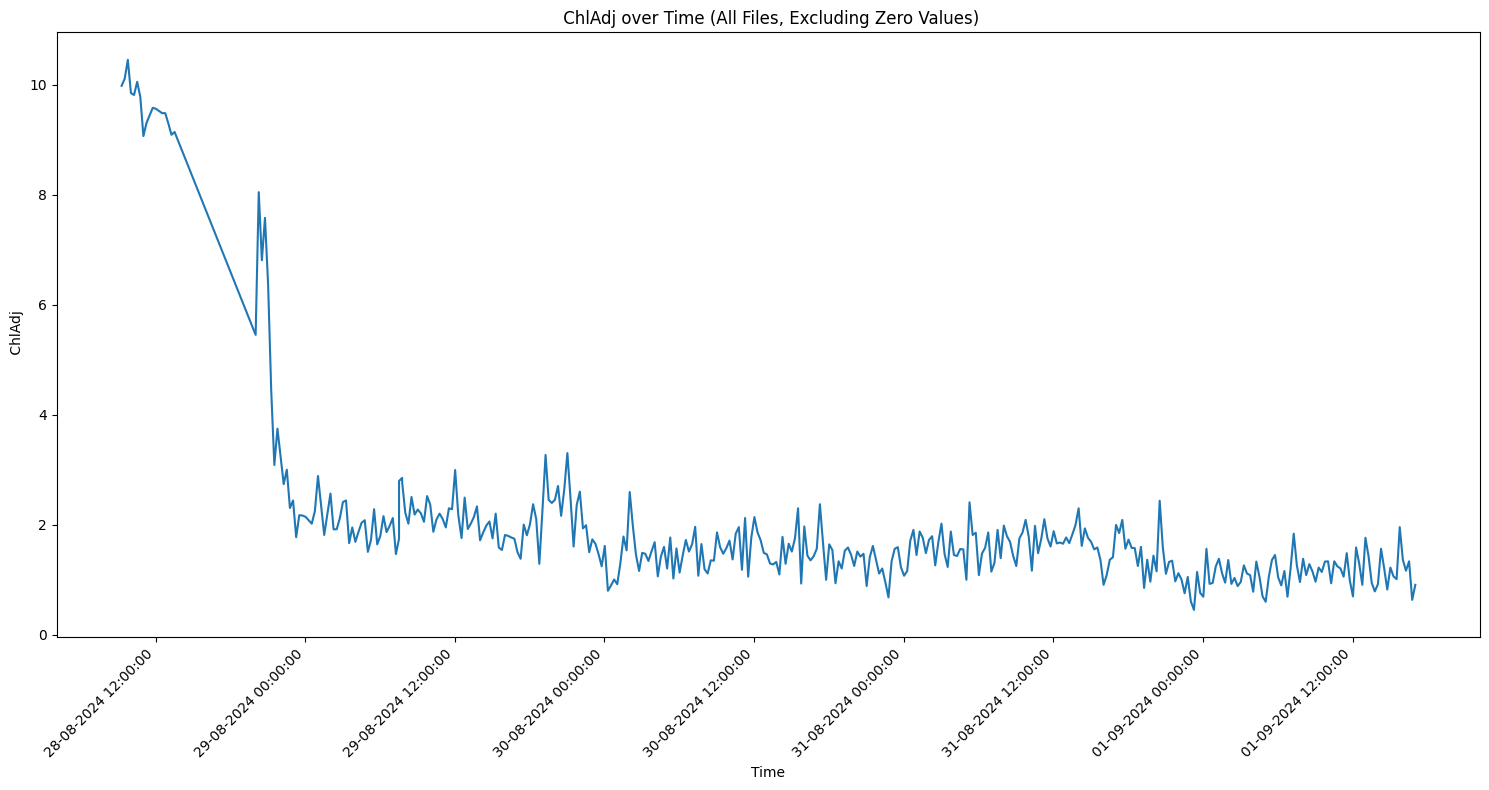

Graph created for  ChlAdj


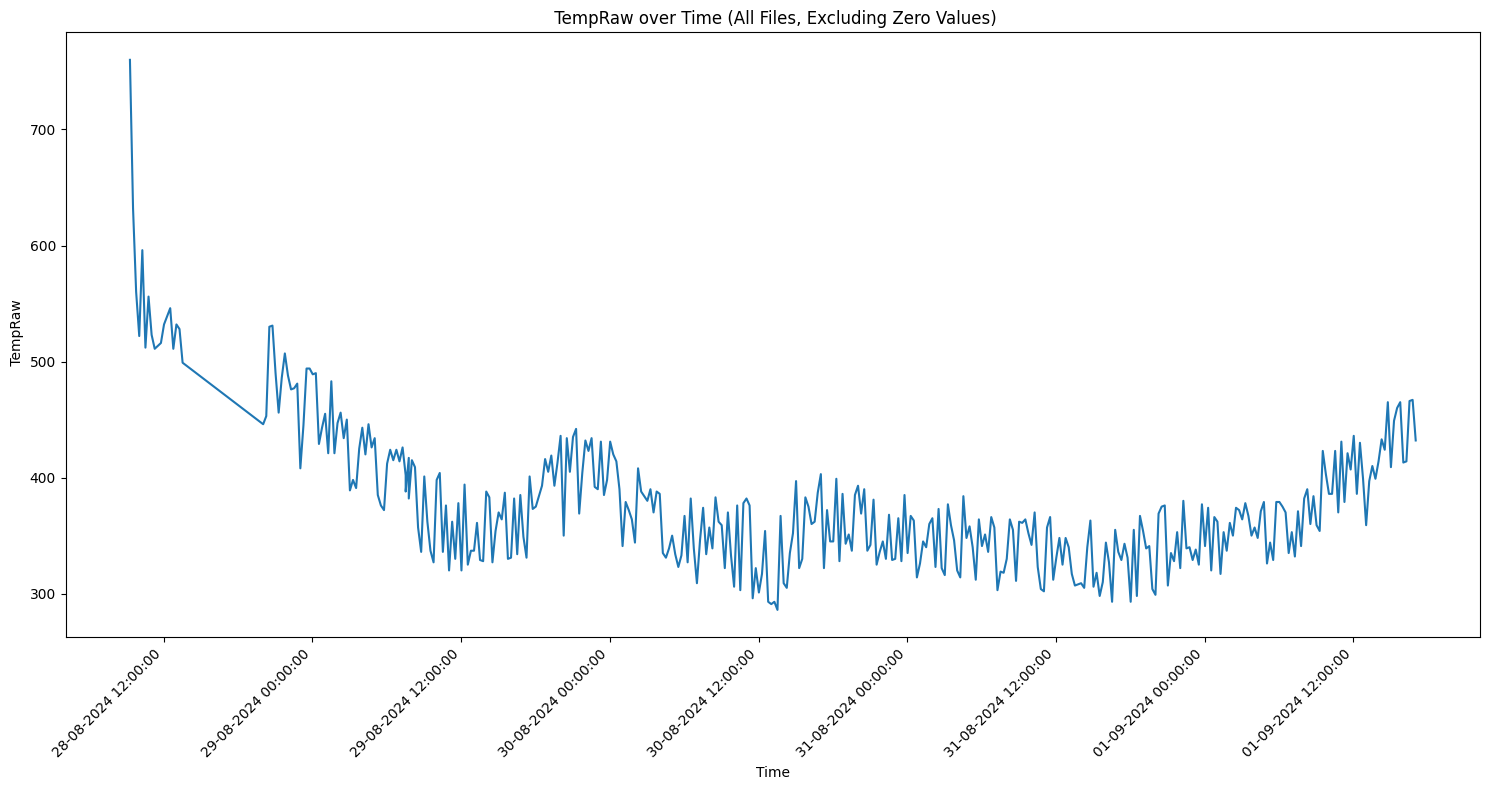

Graph created for  TempRaw


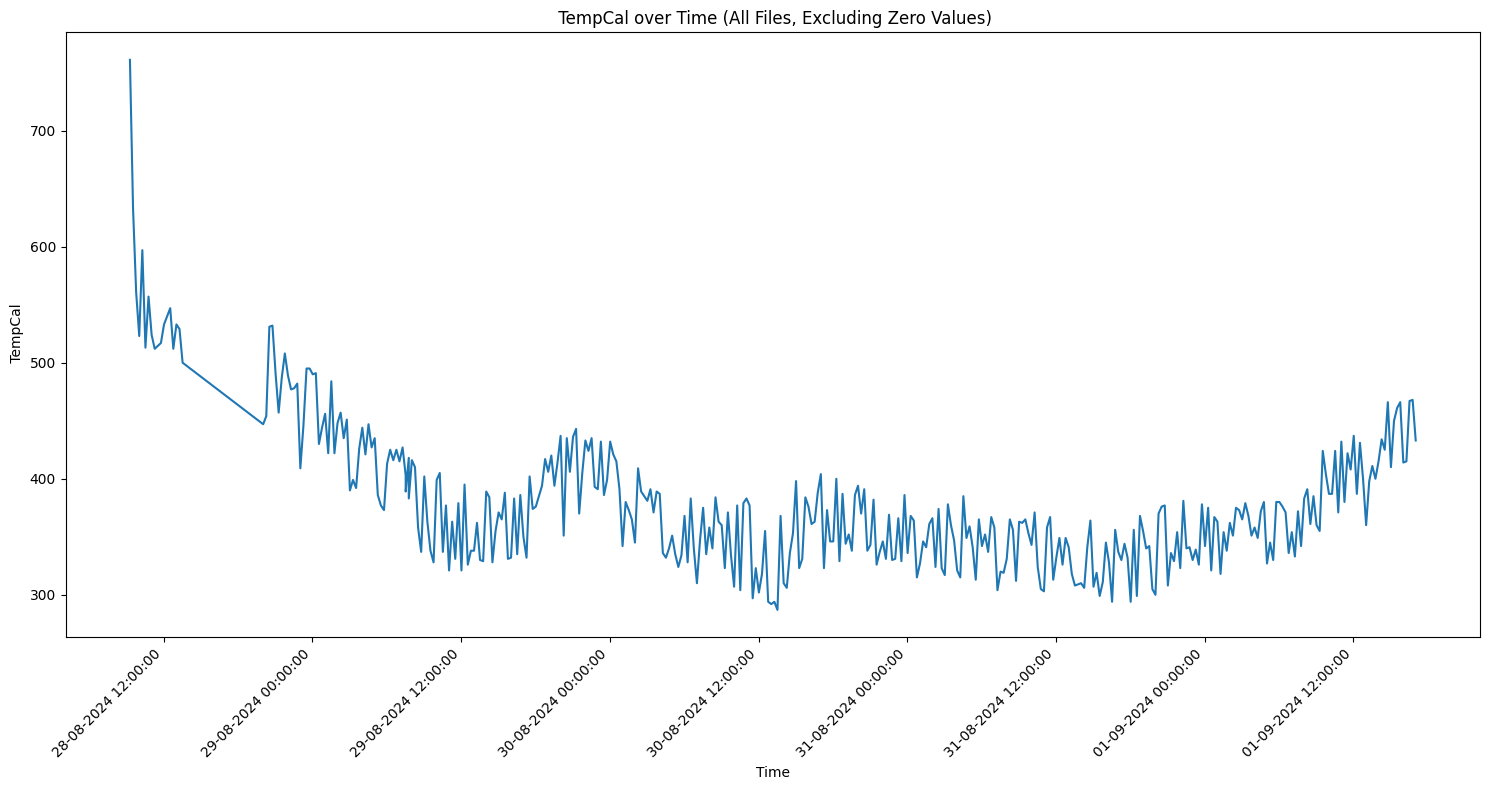

Graph created for  TempCal
All variables processed. Graphs are displayed above.


In [42]:
# Read and combine all CSV files
for file_path in csv_files:
    print(f"Reading file: {file_path}")
    df = pd.read_csv(file_path, parse_dates=['Time'], date_parser=lambda x: pd.to_datetime(x, format='%d-%m-%Y %H:%M:%S'))
    all_data = pd.concat([all_data, df], ignore_index=True)

# Sort the combined data by Time
# Sort the combined data by Time
all_data = all_data.sort_values('Time')

# Get list of all columns except 'Time'
columns_to_plot = [col for col in all_data.columns if col != 'Time']

# Create graphs for each variable
for column in columns_to_plot:
    if not all_data[column].eq('Fail').all():
        # Convert to numeric, replacing non-numeric values with NaN
        numeric_data = pd.to_numeric(all_data[column], errors='coerce')
        
        # Filter out 0 and NaN values
        mask = (numeric_data != 0) & (~numeric_data.isna())
        
        if mask.any():  # Only plot if there are non-zero, non-NaN values
            plt.figure(figsize=(15, 8))
            plt.plot(all_data['Time'][mask], numeric_data[mask])
            plt.title(f'{column} over Time (All Files, Excluding Zero Values)')
            plt.xlabel('Time')
            plt.ylabel(column)
            
            # Format x-axis
            plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M:%S'))
            plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
            
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
            print(f"Graph created for {column}")
        else:
            print(f"No non-zero values to plot for {column}")

print("All variables processed. Graphs are displayed above.")

Columns in the DataFrame:
Index(['Time', 'Probe_TempRaw', 'Probe_TempCal', 'Condraw', 'CondCal',
       'SpCond', 'Salinity', 'TurbRaw', 'TurbCal', 'TurbManu', 'ChlRaw',
       'ChlVolts', 'ChlCal', 'CDOMRaw', 'CDOMVolts', 'CDOMCal', 'CDOMChlEQ',
       ' ChlAdj', ' TempRaw', ' TempCal'],
      dtype='object')
ChlAdj column found as ' ChlAdj'. Proceeding with graph creation.


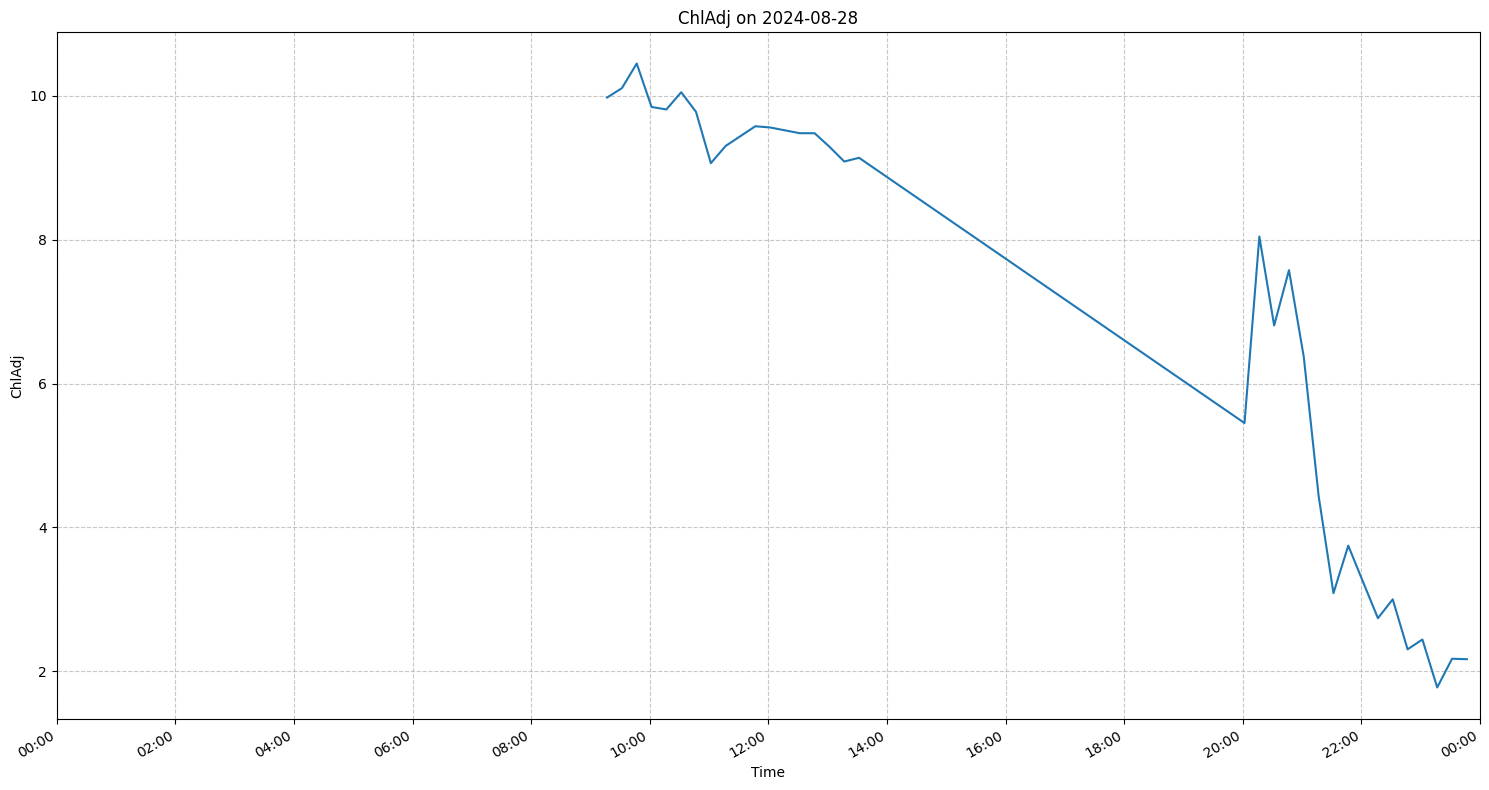

Graph created for 2024-08-28


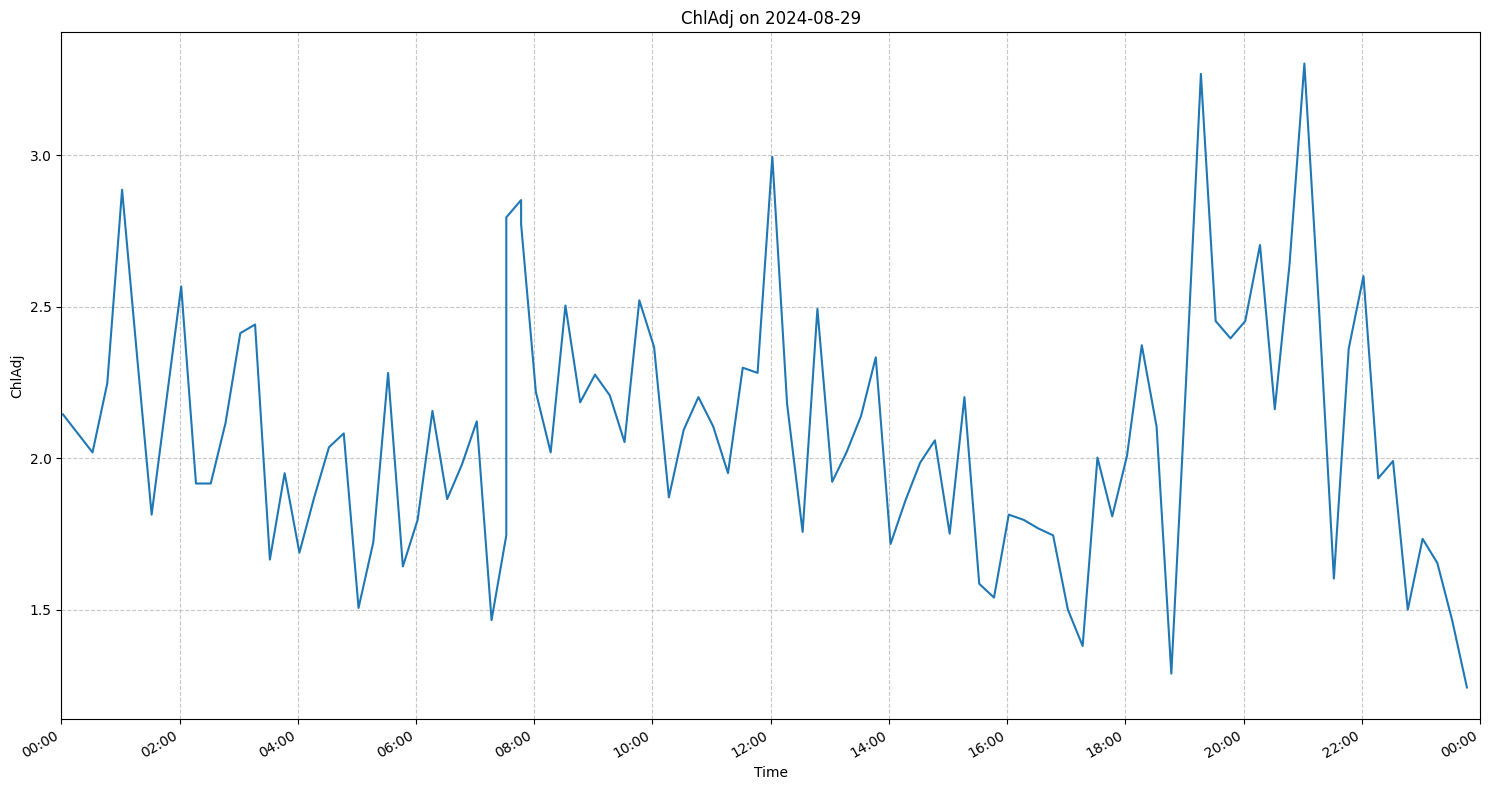

Graph created for 2024-08-29


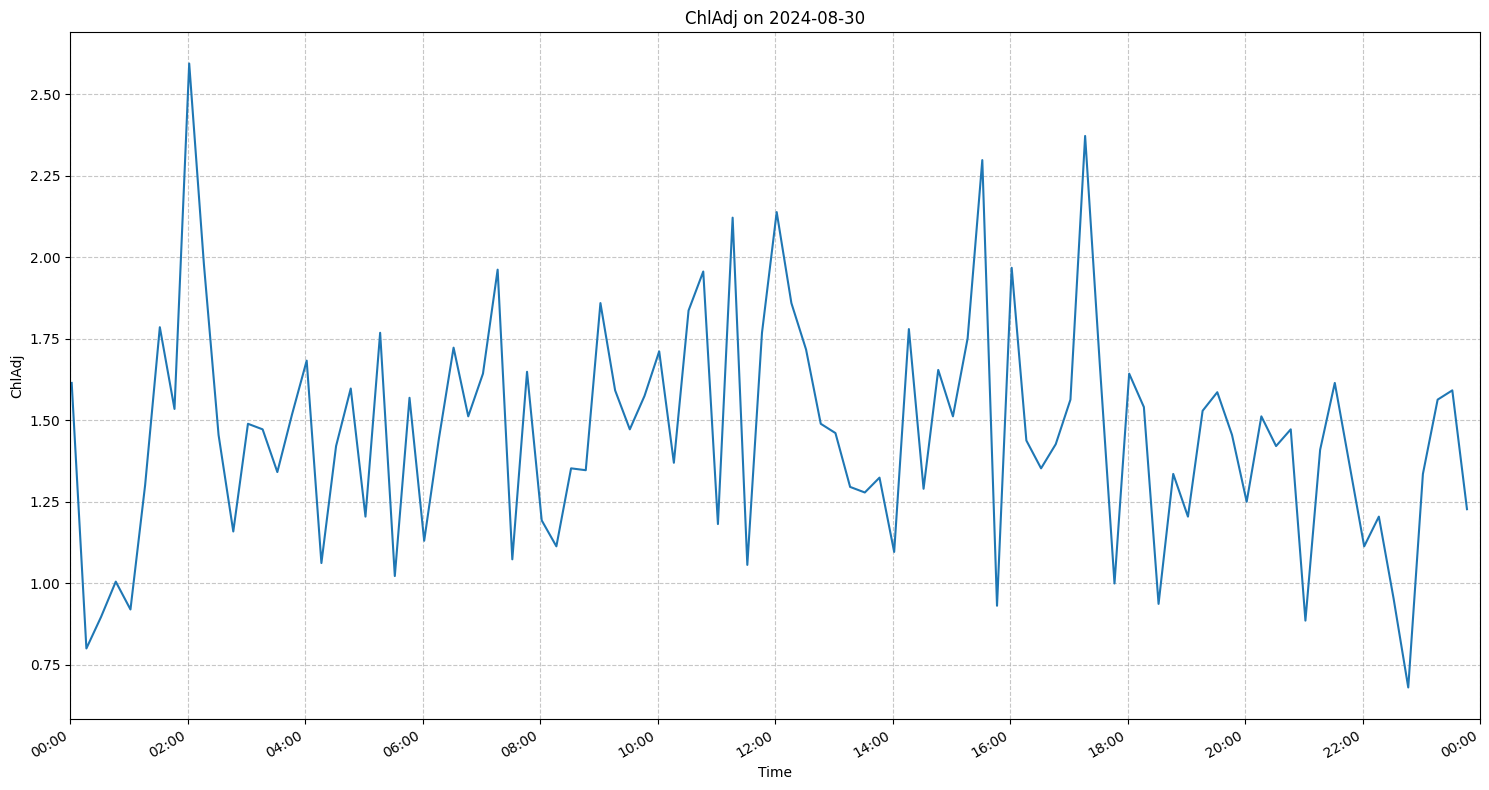

Graph created for 2024-08-30


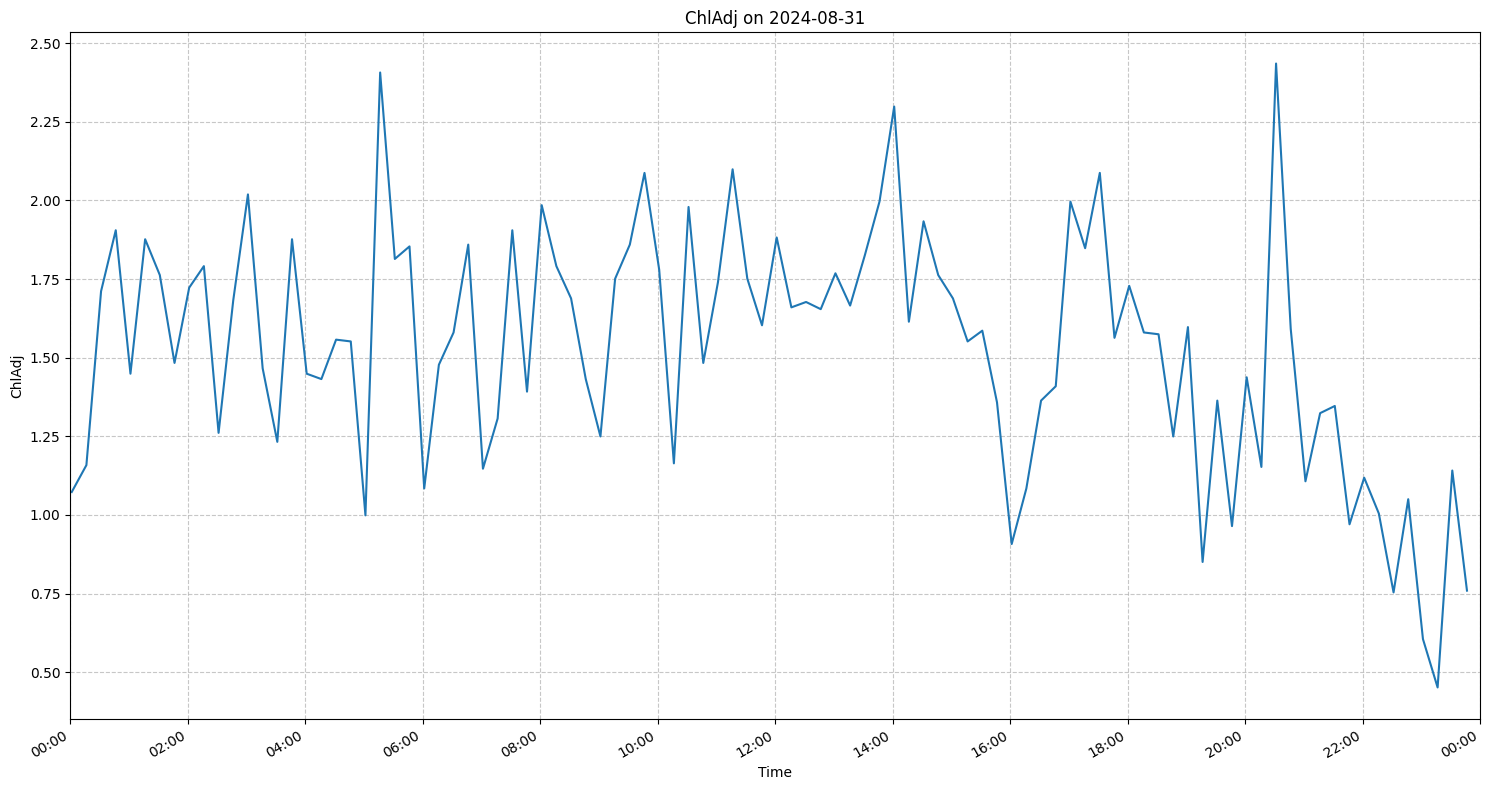

Graph created for 2024-08-31


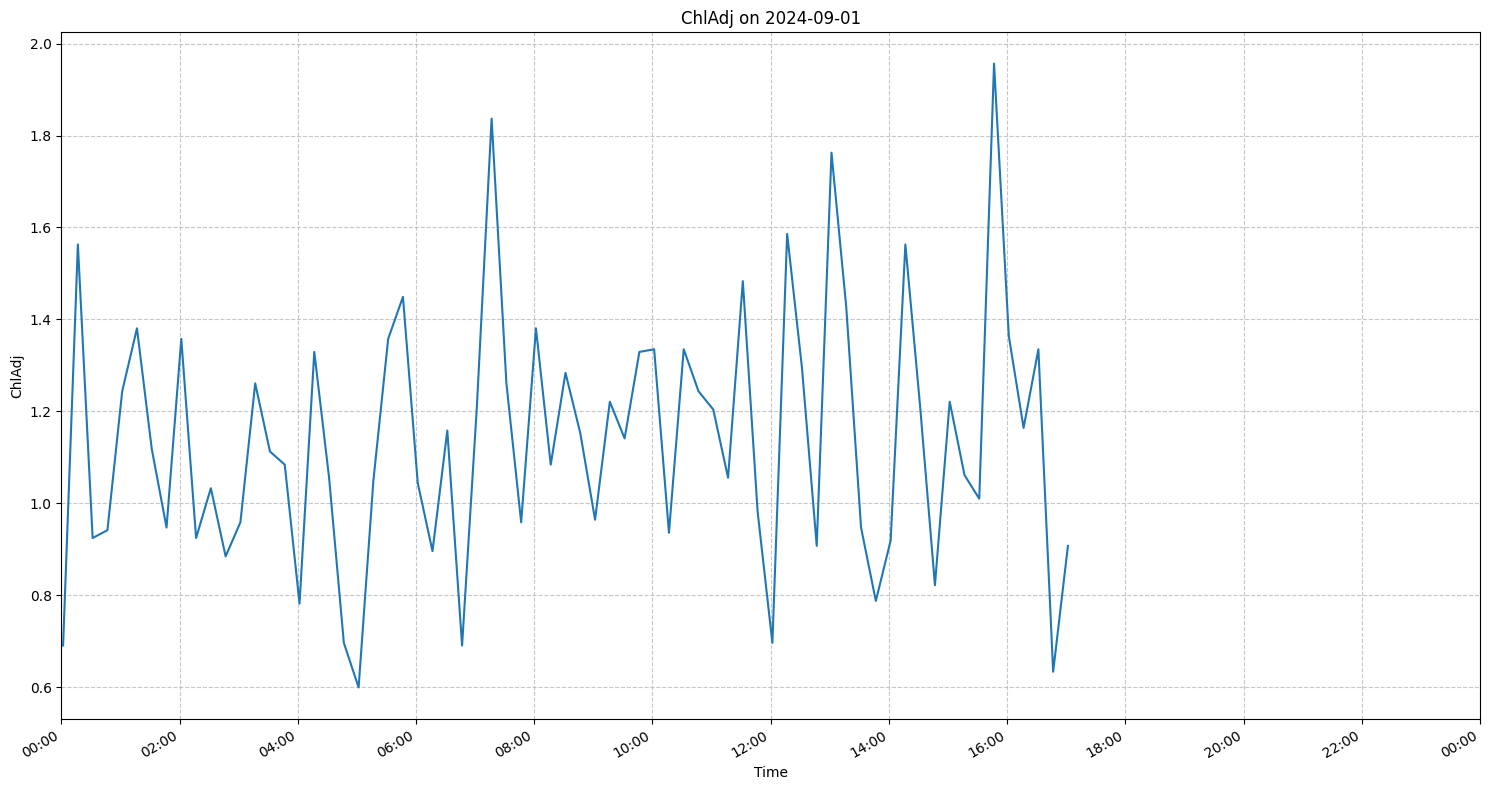

Graph created for 2024-09-01
All daily ChlAdj graphs created and displayed.

Overall statistics for ChlAdj column:
count    391.000000
mean       2.020075
std        1.765555
min        0.451700
25%        1.261100
50%        1.597400
75%        2.013500
max       10.449500
Name:  ChlAdj, dtype: float64


In [43]:
# First, let's verify the columns in our DataFrame
print("Columns in the DataFrame:")
print(all_data.columns)

# Find the ChlAdj column (ignoring spaces)
chladj_col = next((col for col in all_data.columns if col.strip() == 'ChlAdj'), None)

if chladj_col:
    print(f"ChlAdj column found as '{chladj_col}'. Proceeding with graph creation.")
    
    # Ensure 'Time' column is datetime
    all_data['Time'] = pd.to_datetime(all_data['Time'], format='%d/%m/%Y %H:%M:%S')
    
    # Group the data by day
    grouped = all_data.groupby(all_data['Time'].dt.date)
    
    # Create a graph for each day
    for date, group in grouped:
        # Create a new figure
        plt.figure(figsize=(15, 8))
        
        # Plot ChlAdj data for the day
        plt.plot(group['Time'], group[chladj_col])
        
        # Set title and labels
        plt.title(f'ChlAdj on {date}')
        plt.xlabel('Time')
        plt.ylabel('ChlAdj')
        
        # Format x-axis
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
        
        # Set x-axis limits to full day
        plt.xlim(date, date + timedelta(days=1))
        
        # Rotate and align the tick labels so they look better
        plt.gcf().autofmt_xdate()
        
        # Add grid for better readability
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Show the plot
        plt.tight_layout()
        plt.show()
        
        print(f"Graph created for {date}")
    
    print("All daily ChlAdj graphs created and displayed.")
    
    # Print some overall statistics about the ChlAdj column
    print("\nOverall statistics for ChlAdj column:")
    print(all_data[chladj_col].describe())
else:
    print("Error: 'ChlAdj' column not found in the DataFrame.")
    print("Available columns are:", list(all_data.columns))